**Get the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

**Data Visualization**

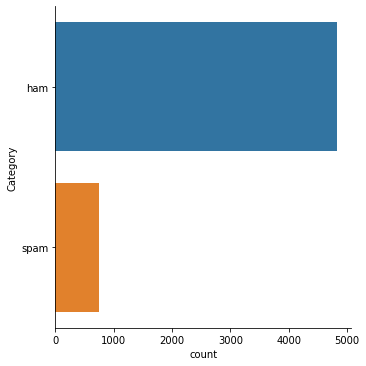

In [ ]:
sb.catplot(y = "Category", data = df, kind = "count")

**Data Cleaning and Wrangling**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
df['spam']=le.transform(df['Category'])
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

**Split string using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
# X_train_count.toarray()[:2]

**Choosing the machine learning method** <br>
The frequencies of words appearing is very important in this dataset, hence probability is the key. Then we can use some methods that work with probability such as Gaussian Naive Bayes, Multinomial NB, Bernoulli NB, etc. <br>
Furthermore, the data we have is discrete data, hence using Multinomial NB is more optimal comparing to Gaussian NB (continuous data) or Bernoulli NB (binary).

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9856424982053122

**Sklearn Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
clf.score(X_test,y_test)

0.9856424982053122

**Recap** <br>
Spam Email Detector is not a new problem. However, it is still needed to optimize the accuracy of the detector. In this project, the accuracy is 0.986 which may be considered good overall <br>
**author: Vu Duc Anh**<br>
**contact: vuducanh1708@gmail.com**